In [1]:
  #imports
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt


In [2]:
weight = 0.2
bias = 0.3
# create
start = 0
end = 1
step = 0.02
X = torch.arange(start , end , step).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
X[:10] , y[:10],len(X)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3040],
         [0.3080],
         [0.3120],
         [0.3160],
         [0.3200],
         [0.3240],
         [0.3280],
         [0.3320],
         [0.3360]]),
 50)

In [4]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(7, 5))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

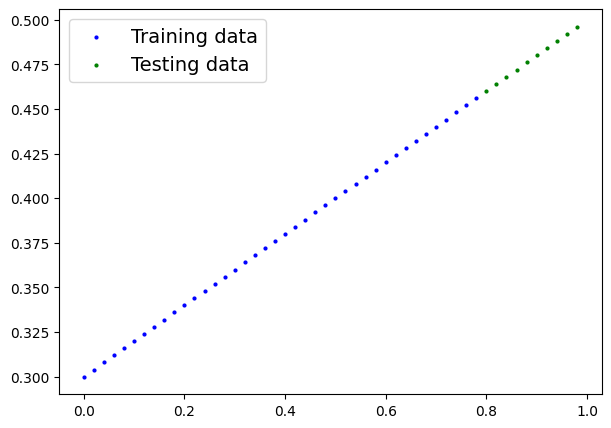

In [6]:
plot_predictions(X_train , y_train ,X_test ,y_test)

# First model

bulding a very simple regression model

In [7]:
class LienearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1 ,
                                                requires_grad=True ,
                                                 dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1 ,
                                        requires_grad=True ,
                                        dtype=torch.float))
  def forward(self , x : torch.Tensor) -> torch.Tensor:
    return  self.weights * x + self.bias




In [8]:
torch.manual_seed(43)
model0 = LienearRegressionModel()
model0

LienearRegressionModel()

In [9]:
#prediction with out trainin
with torch.inference_mode():
  y_preds = model0(X_test)

y_preds

tensor([[-1.2246],
        [-1.2375],
        [-1.2505],
        [-1.2635],
        [-1.2764],
        [-1.2894],
        [-1.3024],
        [-1.3153],
        [-1.3283],
        [-1.3413]])

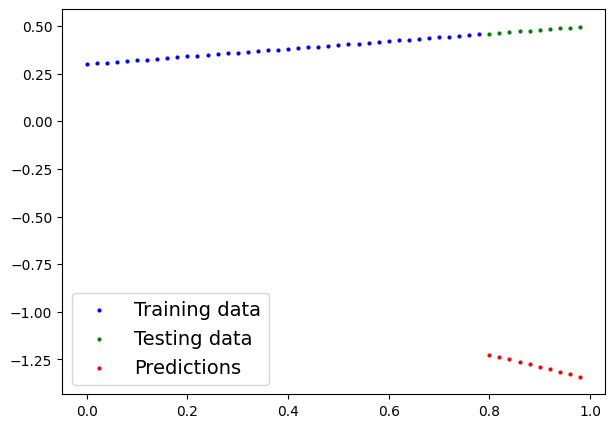

In [10]:
plot_predictions(X_train , y_train ,X_test ,y_test ,predictions=y_preds )

In [11]:
model0.state_dict()

OrderedDict([('weights', tensor([-0.6484])), ('bias', tensor([-0.7058]))])

In [12]:
model0.parameters()

<generator object Module.parameters at 0x79d1deca69d0>

In [13]:
list(model0.parameters())

[Parameter containing:
 tensor([-0.6484], requires_grad=True),
 Parameter containing:
 tensor([-0.7058], requires_grad=True)]

assigning the loss and optimizer

In [14]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model0.parameters()  , lr=0.001)

making the trian loop

In [15]:
trian_loss_value = []
test_loss_value =[]
epoch_count = []
def trianing():
  epochs = 5000

  for epoch in range(epochs):
    #set the model to traning mode

    model0.train() # set all the prameters that require graidient to tracking

    # forward pass
    y_pred = model0(X_train)

    # calculate the loss
    loss = loss_fn(y_pred  , y_train)

    #optimizer zero grad
    optimizer.zero_grad()

    #perform bachprop on the loss with respect ot prameters
    loss.backward()

    #step the o0p-timizser (perform the grtadient desecent)
    optimizer.step()


    model0.eval() # turns off the gradient tracking


    with torch.inference_mode():
      pred = model0(X_test)
    trian_loss_value.append(loss)
    test_loss_value.append(loss_fn(pred , y_test))
    epoch_count.append(epoch)
    print(f" epoch = {epoch}")
    print(f"    the train loss= {loss}")
    print(f"    the test loss = {loss_fn(pred , y_test)}")
    print("---------------------------------------------")
  print(model0.state_dict())

In [16]:
trianing()
#feel free to increment the epochs number

Streaming output truncated to the last 5000 lines.
    the train loss= 0.0008967459434643388
    the test loss = 0.0005214422708377242
---------------------------------------------
 epoch = 3751
    the train loss= 0.00025533660664223135
    the test loss = 0.0008256376022472978
---------------------------------------------
 epoch = 3752
    the train loss= 0.0008967459434643388
    the test loss = 0.0005214422708377242
---------------------------------------------
 epoch = 3753
    the train loss= 0.00025533660664223135
    the test loss = 0.0008256376022472978
---------------------------------------------
 epoch = 3754
    the train loss= 0.0008967459434643388
    the test loss = 0.0005214422708377242
---------------------------------------------
 epoch = 3755
    the train loss= 0.00025533660664223135
    the test loss = 0.0008256376022472978
---------------------------------------------
 epoch = 3756
    the train loss= 0.0008967459434643388
    the test loss = 0.000521442270837724

prediction after training

loss =  tensor(0.0008)


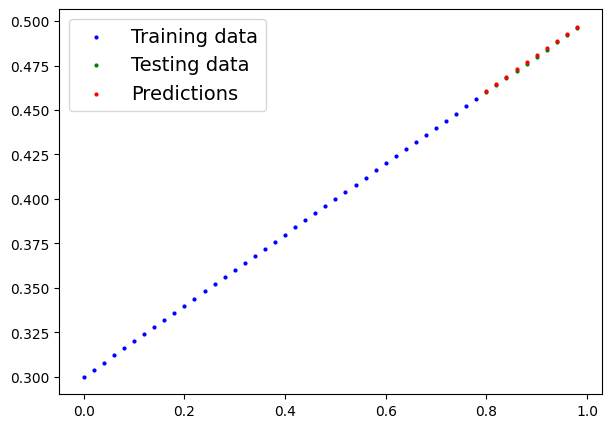

In [17]:
with torch.inference_mode():
  y_preds = model0(X_test)

y_preds
print("loss = ", loss_fn(y_preds  , y_test))
plot_predictions(X_train , y_train ,X_test ,y_test ,predictions=y_preds )


ploting our train and test losses at each epochs

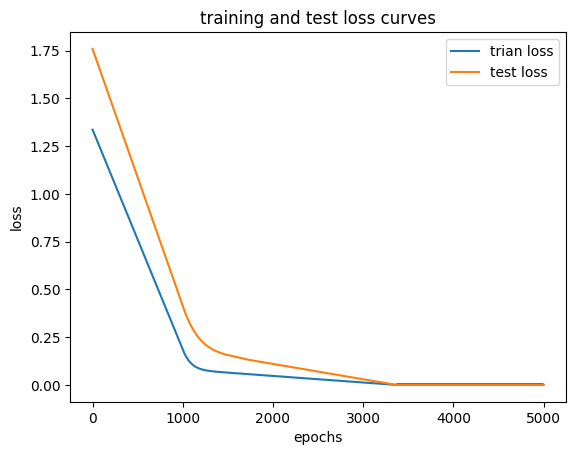

In [18]:
plt.plot(epoch_count , np.array(torch.tensor(trian_loss_value)) ,label="trian loss")
plt.plot(epoch_count , test_loss_value ,label="test loss" )
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()


In [19]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.001,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

In [20]:
# savin the model parameters

from pathlib import Path
# 1.create model directory
model_path = Path("models")
model_path.mkdir(parents=True , exist_ok= True)

# 2.crate model save path
model_name = "FirstModel.pth"
model_save_path = model_path / model_name
model_save_path


torch.save(model0.state_dict() , model_save_path)

In [21]:
model = LienearRegressionModel()
model.load_state_dict(torch.load(f=model_save_path))
model.eval()

LienearRegressionModel()

# Second model


In [22]:
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02

x = torch.arange(start , end , step).unsqueeze(dim=1)
y = weight*x + bias

In [23]:
from sklearn.model_selection import train_test_split
trainX , testX ,trainY  , testY = train_test_split(x , y , test_size=0.2)

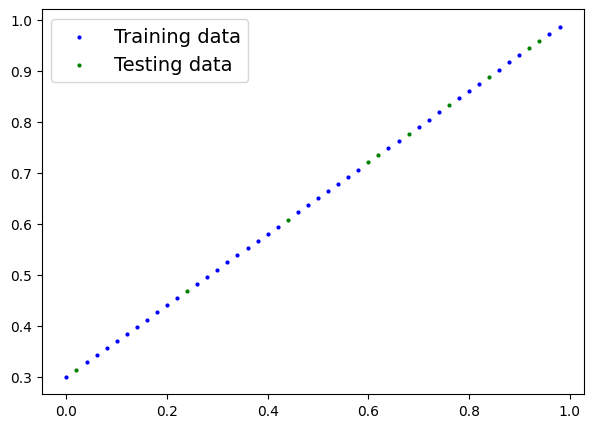

In [24]:
# plot the data
plot_predictions(trainX , trainY , testX , testY)

building a model with linear layer

In [25]:
class linearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)



torch.manual_seed(42)
model1 = linearRegressionModelV2()

model1.state_dict()




OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

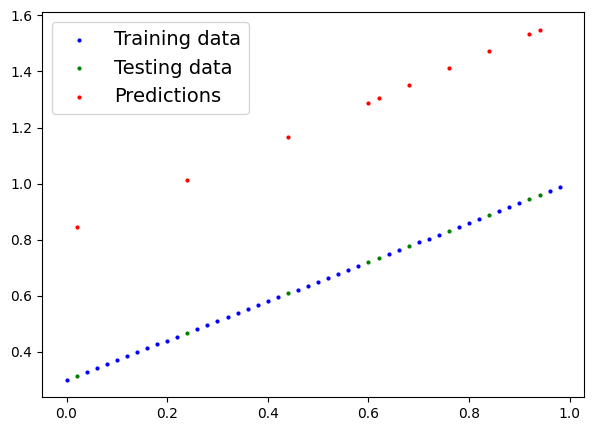

In [26]:
with torch.inference_mode():
 pred = model1(testX)

plot_predictions(trainX , trainY , testX , testY , predictions=pred)

In [27]:
next(model1.parameters()).device

device(type='cpu')

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [29]:
model1.to(device)

linearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [30]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model1.parameters()  , lr=0.001)

In [31]:
epochs=1000
for epoch in range(epochs ):

  model1.train()

  predY = model1(trainX)


  loss = loss_fn(predY , trainY)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model1.eval()
  with torch.inference_mode():
    test_p = model1(testX)
    test_loss = loss_fn(test_p , testX)

  print(f"loss: {loss} \n test loss:{test_loss} \n ------------------")








loss: 0.5597601532936096 
 test loss:0.6860388517379761 
 ------------------
loss: 0.5585476160049438 
 test loss:0.6847595572471619 
 ------------------
loss: 0.5573351979255676 
 test loss:0.6834802627563477 
 ------------------
loss: 0.5561226606369019 
 test loss:0.6822009086608887 
 ------------------
loss: 0.5549101829528809 
 test loss:0.6809214353561401 
 ------------------
loss: 0.5536977052688599 
 test loss:0.6796422004699707 
 ------------------
loss: 0.5524851083755493 
 test loss:0.6783629059791565 
 ------------------
loss: 0.5512726902961731 
 test loss:0.6770834922790527 
 ------------------
loss: 0.5500602126121521 
 test loss:0.6758041381835938 
 ------------------
loss: 0.5488476753234863 
 test loss:0.6745247840881348 
 ------------------
loss: 0.5476351976394653 
 test loss:0.6732454895973206 
 ------------------
loss: 0.5464226603507996 
 test loss:0.6719661355018616 
 ------------------
loss: 0.5452101826667786 
 test loss:0.6706868410110474 
 ------------------

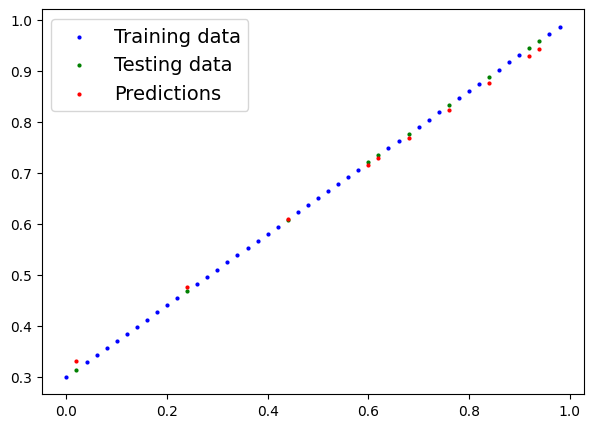

In [32]:
with torch.inference_mode():
 pred = model1(testX)

plot_predictions(trainX , trainY , testX , testY , predictions=pred)

In [33]:
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6647]])),
             ('linear_layer.bias', tensor([0.3169]))])

In [34]:
torch.save(model1.state_dict() , "models/secondModel.pth")